<a href="https://colab.research.google.com/github/twillixa/HEC/blob/main/SL/Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Useful links and material

*   Google or-tools installation:  https://developers.google.com/optimization/introduction/installing
*   Quick startt with or-tools:
https://developers.google.com/optimization/introduction/get_started
*   Complete documentation:
https://developers.google.com/optimization/
*   Learn from examples:
https://github.com/google/or-tools/tree/stable/examples/python

The following part of the notebook introduces to the 3 exercises we explain and solve in this class section.



# 1. Finding a feasible solution to a constrainted problem

1. First step necessary in google colab or other remote notebooks is the installation of the necessary tools. Here we install google or-tools with the following command.

```
!pip3 install ortools
```



In [ ]:
!pip3 install ortools
from ortools.sat.python import cp_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.5/323.5 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.6
    Uninstalling protobuf-5.29.6:
      Successfully uninstalled protobuf-5.29.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.33.5 which is incompatible.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.

2. Here we define our function that does not require any input and it's composed by the following parts:


*   Model creation
*   Variable creation
*   Constraints declaration
*   Solver declaration and call


In [ ]:
def SimpleSatProgram():
    """Minimal CP-SAT example to showcase calling the solver."""
    # Creates the model.
    model = cp_model.CpModel()

    # Creates the variables.
    num_vals = 3
    x = model.NewIntVar(0, num_vals - 1, 'x')
    y = model.NewIntVar(0, num_vals - 1, 'y')
    z = model.NewIntVar(0, num_vals - 1, 'z')

    # Creates the constraints.
    model.Add(x != y)
    model.Add(x > z)

    # Creates a solver and solves the model.
    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    if status == cp_model.OPTIMAL:
        print('x = %i' % solver.Value(x))
        print('y = %i' % solver.Value(y))
        print('z = %i' % solver.Value(z))


3. Last step is to just call our function containing all the logic defined

In [ ]:
SimpleSatProgram()

x = 1
y = 0
z = 0


# 2. Optimization of a Linear Program (LP)

1. We first import the necessary packages -> we need the LP solver provided by or-tools

In [ ]:
#!pip install ortools
from ortools.linear_solver import pywraplp

2. As in the previous exercise we need to proceed by declaring the solver we need, our constraints and variables and proceed getting our solution

In [ ]:
def LinearProgrammingExample():
    """Linear programming sample."""

    # Instantiate a Glop solver, naming it LinearExample.
    solver = pywraplp.Solver.CreateSolver('CLP')

    # Create the two variables and let them take on any non-negative value.
    x = solver.NumVar(0, solver.infinity(), 'x')
    y = solver.NumVar(0, solver.infinity(), 'y')

    print('Number of variables =', solver.NumVariables())

    # Constraint 0: x + 2y <= 14.
    solver.Add(x + 2 * y <= 14.0)

    # Constraint 1: 3x - y >= 0.
    solver.Add(3 * x - y >= 0.0)

    # Constraint 2: x - y <= 2.
    solver.Add(x - y <= 2.0)

    print('Number of constraints =', solver.NumConstraints())

    # Objective function: 3x + 4y.
    solver.Maximize(3 * x + 4 * y)

    # Solve the system.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solution:')
        print('Objective value =', solver.Objective().Value())
        print('x =', x.solution_value())
        print('y =', y.solution_value())
    else:
        print('The problem does not have an optimal solution.')

    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())
    print('Problem solved in %d branch-and-bound nodes' % solver.nodes())

3. Once the function is defined, we can call it and check the output.

In [ ]:
LinearProgrammingExample()

Number of variables = 2
Number of constraints = 3
Solution:
Objective value = 34.0
x = 6.0
y = 4.0

Advanced usage:
Problem solved in 7.000000 milliseconds
Problem solved in 2 iterations
Problem solved in -1 branch-and-bound nodes


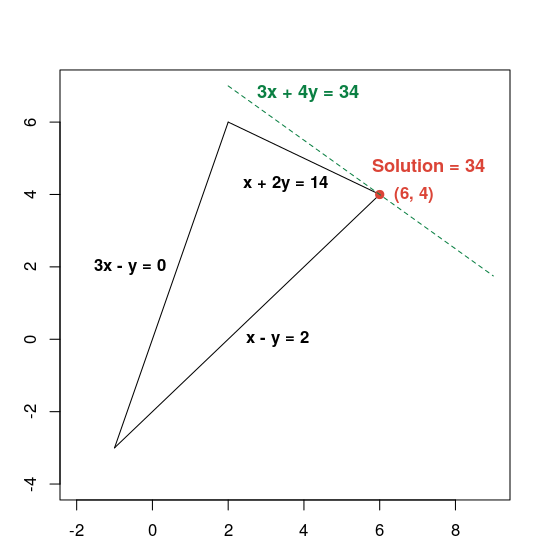

# 3. The N-queens problem

1. Importing the necessary packages

In [ ]:
#!pip install ortools
from __future__ import print_function
from ortools.sat.python import cp_model

2. Defining the main function that contains the resolution logic of the problem.

<html>
<body>
<div><p>The following code defines a function <code>main(board_size)</code> that solves the n-queens problem for a given <code>board_size</code>. The n-queens problem is a problem of placing <code>n</code> queens on an <code>n</code>×<code>n</code> chessboard such that no two queens threaten each other. In this solution, a queen is represented by a column on the chessboard, and the value in the array represents the row where the queen is placed.</p></div>
<div><ol><li><p>The <code>model</code> is created using the <code>cp_model.CpModel()</code> method, which creates an empty constraint programming model.</p></li><li><p>The variables are created using a list comprehension, where the <code>queens</code> list is created with <code>board_size</code> elements, each representing the row where the queen is placed in the corresponding column. The variables are created using the <code>model.NewIntVar</code> method, with a domain of <code>0</code> to <code>board_size-1</code> and a label of <code>x%i</code> where <code>i</code> is the index of the queen.</p></li><li><p>The first constraint is set using the <code>model.AddAllDifferent</code> method, which enforces that all elements in the <code>queens</code> list must be different, meaning that all queens must be in different rows.</p></li><li><p>The second constraint ensures that no two queens are on the same diagonal. This is achieved by creating two arrays <code>diag1</code> and <code>diag2</code> to represent the two diagonals on the chessboard.</p></li><li><p>The inner loop iterates <code>board_size</code> times, creating a new variable <code>q1</code> and <code>q2</code> for each iteration, representing the values on the diagonals.</p></li><li><p>The constraints are added to the model, where <code>q1</code> must be equal to <code>queens[j]+j</code> and <code>q2</code> must be equal to <code>queens[j]-j</code>.</p></li><li><p>The <code>diag1</code> and <code>diag2</code> arrays must be all different, meaning that no two queens can be on the same diagonal. This is enforced using the <code>model.AddAllDifferent</code> method.</p></li><li><p>The <code>solver</code> is created using the <code>cp_model.CpSolver()</code> method, and a <code>solution_printer</code> is created with the <code>queens</code> list as an argument. The <code>status</code> of the solver is set by calling the <code>solver.SearchForAllSolutions</code> method, which searches for all solutions to the constraint programming model.</p></li><li><p>The number of solutions found is printed using the <code>solution_printer.SolutionCount</code> method.</p></li></ol></div>
</body>
</html>

In [ ]:
def main(board_size):

  model = cp_model.CpModel()
  # Creates the variables.
  # The array index is the column, and the value is the row.
  queens = [model.NewIntVar(0, board_size - 1, 'x%i' % i)
            for i in range(board_size)]

  # Creates the constraints.
  # The following sets the constraint that all queens are in different rows.

  model.AddAllDifferent(queens)

  # Note: all queens must be in different columns because the indices of queens are all different.

  # The following sets the constraint that no two queens can be on the same diagonal.

  for i in range(board_size):
    diag1 = []
    diag2 = []
    for j in range(board_size):
      # Create variable array for queens(j) + j.
      # minor diagonal (↙ direction)
      q1 = model.NewIntVar(0, 2 * board_size, 'diag1_%i' % i) # Creates an integer variable representing queens[j] + j
      diag1.append(q1)
      model.Add(q1 == queens[j] + j)
      # Create variable array for queens(j) - j.
      # major diagonal (↘ direction)
      q2 = model.NewIntVar(-board_size, board_size, 'diag2_%i' % i) # Creates an integer variable representing queens[j] - j
      diag2.append(q2)
      model.Add(q2 == queens[j] - j)
    model.AddAllDifferent(diag1)
    model.AddAllDifferent(diag2)


  ### Solve model.
  solver = cp_model.CpSolver()
  solution_printer = SolutionPrinter(queens)
  status = solver.SearchForAllSolutions(model, solution_printer)


  print()
  print('Solutions found : %i' % solution_printer.SolutionCount())
  # Plot the last solution found
  plot_solution([solver.Value(q) for q in queens])


3. In the following block of code we create a simple printing class to output the results.

In [ ]:
class SolutionPrinter(cp_model.CpSolverSolutionCallback):
  """Print intermediate solutions."""

  def __init__(self, variables):
    cp_model.CpSolverSolutionCallback.__init__(self)
    self.__variables = variables
    self.__solution_count = 0

  def OnSolutionCallback(self):
    self.__solution_count += 1
    for v in self.__variables:
      print('%s = %i' % (v, self.Value(v)), end = ' ')
    print()

  def SolutionCount(self):
    return self.__solution_count

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_solution(queens):
    board_size = len(queens)
    chessboard = np.zeros((board_size, board_size))

    for i, row in enumerate(queens):
        chessboard[row][i] = 1  # Place a bishop

    fig, ax = plt.subplots()
    ax.imshow(chessboard, cmap='cividis')

    # Add labels to rows and columns
    ax.set_xticks(np.arange(board_size))
    ax.set_yticks(np.arange(board_size))
    ax.set_xticklabels([str(i + 1) for i in range(board_size)])
    ax.set_yticklabels([chr(65 + i) for i in range(board_size)])

    # Add grid lines
    ax.set_xticks(np.arange(board_size + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(board_size + 1) - 0.5, minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    # Add labels
    ax.set_xlabel('Columns')
    ax.set_ylabel('Rows')
    ax.set_title('N-Queens Solution')

    # Flip the y-axis to match the chessboard orientation
    ax.invert_yaxis()

    plt.show()


4. Calling the main function with the size of the desired chessboard as an input

x0 = 1 x1 = 3 x2 = 0 x3 = 2 
x0 = 2 x1 = 0 x2 = 3 x3 = 1 

Solutions found : 2


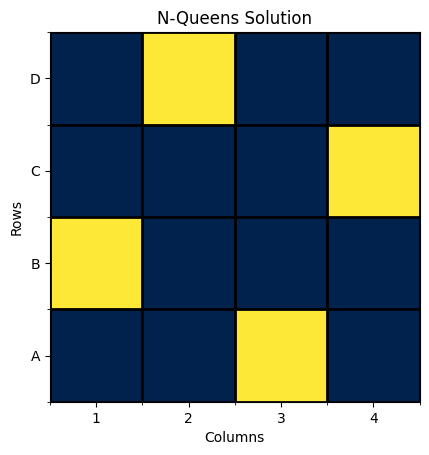

In [ ]:
chessboard_size = 4
main (chessboard_size)

# Homework 1: Resource allocation

A company produces two different products: A and B. The resources available at the moment are composed by **24000 units** of components. Product A has a profit margin of **300CHF** while product B provides **240CHF** of positive margin. We know that product A requires **240 units** while toy B requires **144 units**, and that each typology of product requires **60 minutes** to be assembled. Since the company has still **16 days** of production available, each composed by **8h** total productive time, how many A products and B products should the company produce in order to maximize its profit?

In [ ]:
# Hint: use pywraplp to solve it

# Homework 2: Sudoku

In [ ]:
# Follow the given structure

from ortools.sat.python import cp_model


def solve_sudoku():
    """Solves the sudoku problem with the CP-SAT solver."""
    # Create the model.
    model = cp_model.CpModel()

    cell_size = 3
    line_size = cell_size**2
    line = list(range(0, line_size))
    cell = list(range(0, cell_size))

    initial_grid = [[0, 6, 0, 0, 5, 0, 0, 2, 0], [0, 0, 0, 3, 0, 0, 0, 9, 0],
                    [7, 0, 0, 6, 0, 0, 0, 1, 0], [0, 0, 6, 0, 3, 0, 4, 0, 0],
                    [0, 0, 4, 0, 7, 0, 1, 0, 0], [0, 0, 5, 0, 9, 0, 8, 0, 0],
                    [0, 4, 0, 0, 0, 1, 0, 0, 6], [0, 3, 0, 0, 0, 8, 0, 0, 0],
                    [0, 2, 0, 0, 4, 0, 0, 5, 0]]

    grid = {}
    for i in line:
        for j in line:
            grid[(i, j)] = model.NewIntVar(1, line_size, 'grid %i %i' % (i, j))


# TODO: write your code below the comments

    # 1. AllDifferent on rows.


    # 2. AllDifferent on columns.


    # 3. AllDifferent on cells.


    # 4. Populate the grid with initial values.



    # Solve and print out the solution.
    solver = cp_model.CpSolver()
    status = solver.Solve(model)
    if status == cp_model.OPTIMAL:
        for i in line:
            print([int(solver.Value(grid[(i, j)])) for j in line])


solve_sudoku()

# Homework 3 - KenKen

- **Objective of the Game**
  - Fill the entire grid with numbers.
  - Make sure no number repeats in any row or column.
  - Solve the puzzle by using arithmetic to match given clues.

- **Game Setup**
  - The puzzle is presented on a square grid (e.g., 4×4, 6×6, etc.).
  - The grid is divided into groups of cells called “cages” by bold lines.
  - Each cage has a target number and an arithmetic operation (addition, subtraction, multiplication, or division). Some cages may only contain one cell, in which case the number is given.

- **Rules for Filling the Grid**
  - **Row and Column Rule:** Each row and each column must have all numbers from 1 up to the size of the grid (for a 4×4 grid, use 1–4) without any repeats.
  - **Cage Rule:** The numbers in each cage must combine, using the specified arithmetic operation, to equal the target number.
    - For example, if a cage in a 4×4 grid shows “6+” with two cells, the two numbers in that cage should add up to 6.
    - In cages with subtraction or division, the order is set so that the operation works correctly (e.g., in a two-cell subtraction cage labeled “2−”, the larger number minus the smaller number must equal 2).

- **How to Approach a KenKen Puzzle**
  - **Start with the Cages:** Look at the cages that have the fewest cells or only one cell, as these often have limited possibilities.
  - **Use Process of Elimination:** Since numbers cannot repeat in any row or column, use this rule to narrow down where each number can go.
  - **Check Your Work:** Regularly review rows, columns, and cages to ensure all conditions are met.

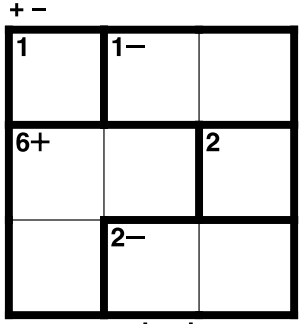


In [ ]:
from ortools.sat.python import cp_model

def solve_kenken(grid_size, cages):
    model = cp_model.CpModel()
    # Create grid variables with domain 1..grid_size.
    grid_vars = {}
    for i in range(grid_size):
        for j in range(grid_size):
            grid_vars[(i, j)] = model.NewIntVar(1, grid_size, f'grid_{i}_{j}')

    # Row constraints: all different in each row.
    for i in range(grid_size):
        model.AddAllDifferent([grid_vars[(i, j)] for j in range(grid_size)])

    # Column constraints: all different in each column.
    for j in range(grid_size):
        model.AddAllDifferent([grid_vars[(i, j)] for i in range(grid_size)])

    # Add cage constraints.
    for target, op, cells in cages:
        if op == '+':
            # For a single-cell cage, the sum is the cell itself.
            model.Add(sum(grid_vars[cell] for cell in cells) == target)
        elif op == '*':
            if len(cells) == 1:
                model.Add(grid_vars[cells[0]] == target)
            elif len(cells) == 2:
                a, b = cells
                model.AddMultiplicationEquality(target, [grid_vars[a], grid_vars[b]])
            else:
                # For multiple cells, chain multiplication using auxiliary variables.
                product_vars = [grid_vars[cell] for cell in cells]
                aux = product_vars[0]
                for idx in range(1, len(product_vars)):
                    # The upper bound for the auxiliary variable can be set to target,
                    # as the product must equal the target.
                    new_aux = model.NewIntVar(1, target, f'aux_{cells[0]}_{idx}')
                    model.AddMultiplicationEquality(new_aux, [aux, product_vars[idx]])
                    aux = new_aux
                model.Add(aux == target)
        elif op == '-':
            # Subtraction is typically defined for two cells.
            if len(cells) == 1:
                model.Add(grid_vars[cells[0]] == target)
            elif len(cells) == 2:
                a, b = cells
                model.AddAbsEquality(target, grid_vars[a] - grid_vars[b])
            else:
                raise NotImplementedError("Subtraction for more than 2 cells is not implemented.")
        elif op == '/':
            # Division is typically defined for two cells.
            if len(cells) == 1:
                model.Add(grid_vars[cells[0]] == target)
            elif len(cells) == 2:
                a, b = cells
                # Create two booleans to indicate which division ordering holds.
                div1 = model.NewBoolVar('div1')
                div2 = model.NewBoolVar('div2')
                # If div1 is true then grid_vars[a] == target * grid_vars[b]
                model.Add(grid_vars[a] == target * grid_vars[b]).OnlyEnforceIf(div1)
                # If div2 is true then grid_vars[b] == target * grid_vars[a]
                model.Add(grid_vars[b] == target * grid_vars[a]).OnlyEnforceIf(div2)
                model.AddBoolOr([div1, div2])
            else:
                raise NotImplementedError("Division for more than 2 cells is not implemented.")
        else:
            raise ValueError(f"Unsupported operation: {op}")

    # Solve and print the solution.
    solver = cp_model.CpSolver()
    status = solver.Solve(model)
    if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
        for i in range(grid_size):
            print([solver.Value(grid_vars[(i, j)]) for j in range(grid_size)])
    else:
        print("No solution found.")

# Example usage:
grid_size = 3  # For a 4x4 KenKen puzzle

# Define cages as tuples: (target, operation, list of cell coordinates).
# Each cell is specified as a (row, column) tuple using 0-indexing.
# cages = [
#     (6, '+', [(0, 0), (0, 1), (1,0)]),
#     (1, '+', [(0, 2)]),
#     (3, '+', [(2, 0), (2, 1)]),
#     (3, '+', [(1, 1)]),
#     (1, '+', [(0, 2)]),
#     (1, '-', [(1, 2), (2,2)])
# ]

cages = [
    (1, '+', [(0, 0)]),
    (1, '-', [(0, 1), (0, 2)]),
    (6, '+', [(1, 0), (1, 1), (2, 0)]),
    (2, '+', [(1, 2)]),
    (2, '-', [(2, 1), (2,2)])
]

# Call the function to solve and print the KenKen puzzle.
solve_kenken(grid_size, cages)


[1, 2, 3]
[3, 1, 2]
[2, 3, 1]
